In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_csv("Downloads/tips (data for regression problem).csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['time'] = le.fit_transform(df['time'])
df = pd.get_dummies(df, columns=['day'], drop_first=True)

In [9]:
df.head()

,total_bill,tip,sex,smoker,time,size,day_Sat,day_Sun,day_Thur
0,16.99,1.01,0,0,0,2,False,True,False
1,10.34,1.66,1,0,0,3,False,True,False
2,21.01,3.50,1,0,0,3,False,True,False
3,23.68,3.31,1,0,0,2,False,True,False
4,24.59,3.61,0,0,0,4,False,True,False


## Scatter Plot for Target Variable vs Predictors

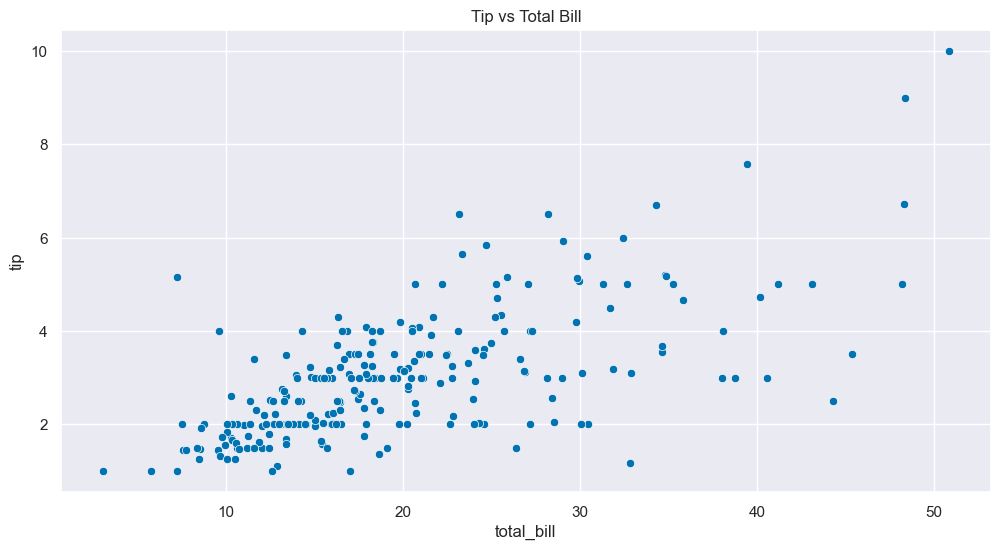

In [37]:
# Numerical variables
sns.set_theme(style="darkgrid", palette="colorblind")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('Tip vs Total Bill')
plt.show()

## Pair Plot for Multiple Features

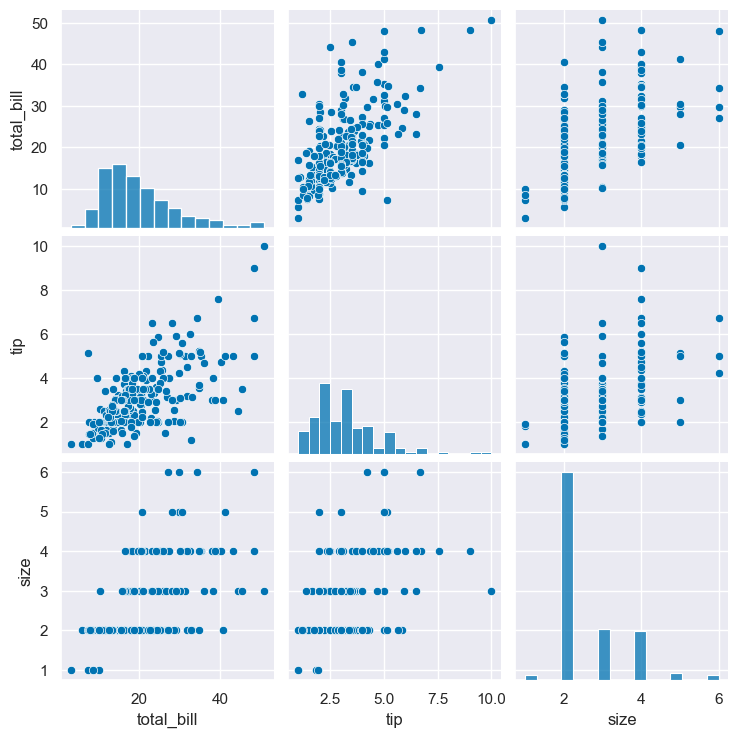

In [38]:
sns.set_theme(style="darkgrid", palette="colorblind")
sns.pairplot(df[['total_bill', 'tip', 'size']])
plt.show()

##  Correlation Matrix (Heatmap)

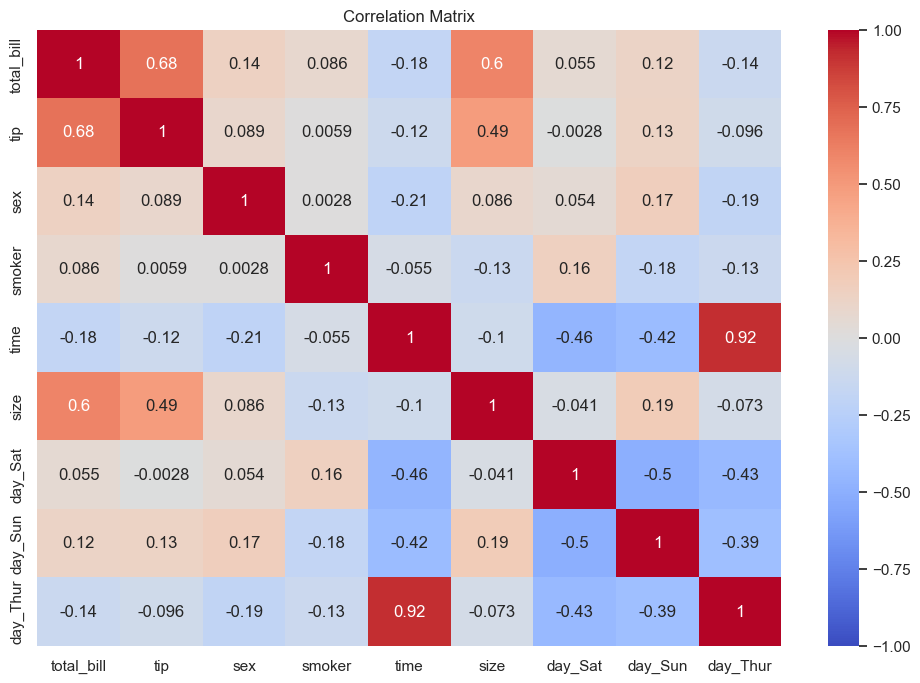

In [39]:
sns.set_theme(style="darkgrid", palette="colorblind")
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

## Rainbow Test for Linearity

In [11]:
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow

model = ols('tip ~ total_bill + size + sex + smoker + time + day_Sat + day_Sun + day_Thur', data=df).fit()

stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {stat:.3f}")
print(f"Rainbow Test p-value: {p_value:.3f}")

if p_value < 0.05:
    print("The p-value is low, suggesting that a linear model may not be a good fit.")
else:
    print("The p-value is high, suggesting that a linear model may be appropriate.")

Rainbow Test Statistic: 1.197
Rainbow Test p-value: 0.166
The p-value is high, suggesting that a linear model may be appropriate.


## Box Plot

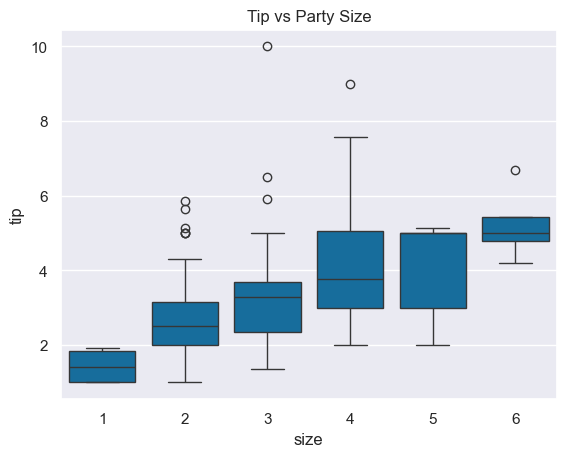

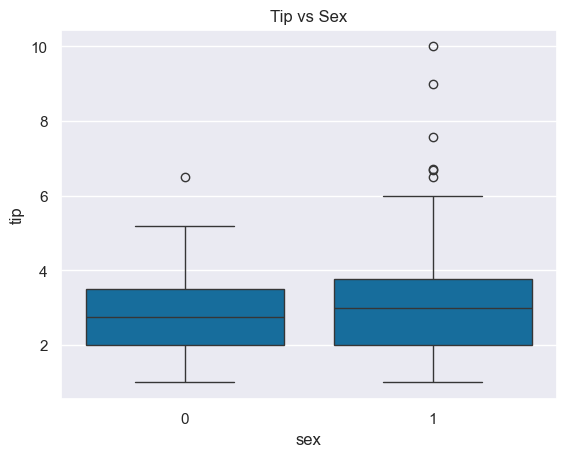

In [40]:
sns.set_theme(style="darkgrid", palette="colorblind")
sns.boxplot(data=df, x='size', y='tip')
plt.title('Tip vs Party Size')
plt.show()

# Categorical variables
sns.boxplot(data=df, x='sex', y='tip')
plt.title('Tip vs Sex')
plt.show()

## Correlation analysis

In [35]:
from scipy.stats import f_oneway

print(df[['total_bill', 'tip', 'size']].corr())

# ANOVA for categorical variables
categorical_vars = ['sex', 'smoker', 'time']
for var in categorical_vars:
    groups = [group['tip'].values for name, group in df.groupby(var)]
    p_value = f_oneway(*groups).pvalue
    print(f"ANOVA p-value for {var}: {p_value}")

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000
ANOVA p-value for sex: 0.16645623503457202
ANOVA p-value for smoker: 0.926593152224447
ANOVA p-value for time: 0.05780153475171573


## Residuals Plot

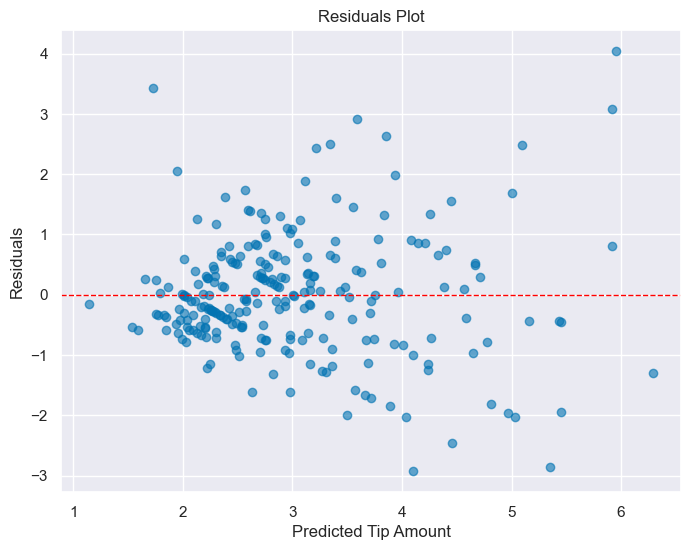

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Fit the linear regression model
X = df[['total_bill', 'size']]
y = df['tip']
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict on the data and calculate residuals
y_pred = linear_model.predict(X)
residuals = y - y_pred

# Plot residuals without lowess smoothing
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Tip Amount")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

## Sequential Tip Plot

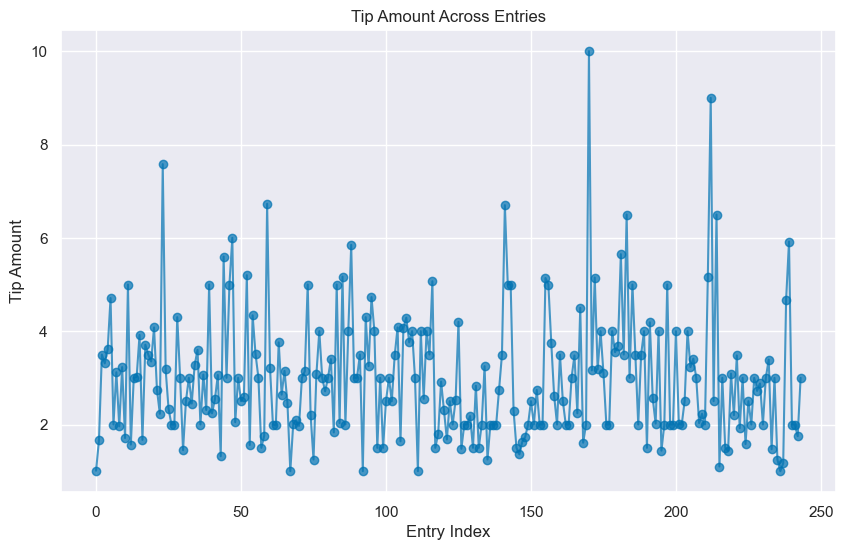

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['tip'], marker='o', linestyle='-', color='b', alpha=0.7)
plt.title("Tip Amount Across Entries")
plt.xlabel("Entry Index")
plt.ylabel("Tip Amount")
plt.show()

## Conclusion
Total bill and size are key factors affecting tips.
Time may have a marginal effect.
Other variables (e.g., smoker, sex) are not significant.

In [14]:
X = df.drop(columns='tip')  # Features
y = df['tip'] # Target

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regression Models

### Linear Regression

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

Linear Regression MSE: 0.7033566017436105
Linear Regression R2: 0.43730181943482505


### Ridge Regression

In [17]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))

Ridge Regression MSE: 0.7007477213216079
Ridge Regression R2: 0.4393889716178482


### Lasso Regression

In [18]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))

Lasso Regression MSE: 0.5908528649971524
Lasso Regression R2: 0.5273068720881755


### Decision Tree Regressor

In [19]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))

Decision Tree MSE: 1.2111734693877552
Decision Tree R2: 0.031039012239580832


### Random Forest Regressor

In [20]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest MSE: 0.9268811291836745
Random Forest R2: 0.25847809816681433


### Support Vector Regression (SVR)

In [21]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print("SVR MSE:", mean_squared_error(y_test, y_pred_svr))
print("SVR R2:", r2_score(y_test, y_pred_svr))

SVR MSE: 0.5323763062616395
SVR R2: 0.5740891915042663


### K-Nearest Neighbors (KNN)

In [22]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN MSE:", mean_squared_error(y_test, y_pred_knn))
print("KNN R2:", r2_score(y_test, y_pred_knn))

KNN MSE: 0.8763725714285714
KNN R2: 0.29888587066985495


# Insights for Management

### 1. Focus on Total Bill Amount
    Key Insight: A strong positive correlation (r=0.68) exists between the total bill and tip amounts. Higher bills tend to result in higher tips.
    Recommendation: Train staff to encourage upselling (e.g., recommending desserts or premium options) as this could increase total bill size and tips, enhancing server satisfaction and retention.

### 2. Optimize Service for Larger Groups
    Key Insight: Party size is positively correlated with tip amounts (r=0.49). Larger parties tend to leave larger tips.
    Recommendation: Allocate experienced staff to larger groups to maximize customer satisfaction and tips. Consider offering group discounts or perks to attract more large parties.
    
### 3. Reevaluate the Role of Non-Significant Factors
    Key Insight: Variables like gender, smoker status, and time (lunch vs. dinner) showed no statistically significant impact on tipping behavior (p-values > 0.05).
    Recommendation: Avoid targeting these demographics in marketing campaigns. Focus instead on universally appealing strategies like improving service quality or introducing loyalty programs.
    
### 4. Enhance Revenue Through Evening Services
    Key Insight: ANOVA results suggest time (lunch vs. dinner) has a marginal effect on tips (p-value = 0.057), potentially favoring dinners.
    Recommendation: Extend dinner hours or introduce happy hours during evenings to capitalize on potentially higher tipping behaviors.
    
### 5. Adopt Technology for Service Customization
    Key Insight: Regression models like SVR and Lasso performed relatively well in predicting tips (R² = 0.57 and 0.53, respectively).
    Recommendation: Use predictive analytics tools to forecast tipping behavior. For example, a recommendation system could prompt servers with personalized suggestions to improve customer experiences based on historical data.
    
### 6. Improve Predictive Accuracy
    Key Insight: SVR had the best performance among the tested models, but R² scores (~57%) indicate room for improvement.
    Recommendation: Enhance data collection by including additional variables such as meal type, duration of stay, or server rating. These could significantly improve prediction accuracy and provide deeper insights into customer behaviors.